# 🧩 시나리오 기반 프로젝트 실습 문제
## 🎓 AI 스타트업에서의 첫 실전 미션!

당신은 AI 스타트업 `InsightMind`의 신입 머신러닝 엔지니어입니다. 첫 출근과 동시에 두 가지 미션이 주어집니다:
- 부동산 기업의 주택 가격 예측 시스템 개발
- 식물원 전시를 위한 붓꽃 품종 분류기 개발

이 문제들은 실습 중심으로 구성되어 있으며, 각 단계에서 코드를 직접 작성하고 결과를 분석합니다.

## ✅ 미션 A. 데이터 준비 및 스케일링 요정의 조언
**🧙‍♀️ 요정 조언:** 거리 기반 모델들은 특성의 크기에 민감하단다. 스케일링을 안 하면 예측이 뒤틀릴 거야!

### 🔹 문제 A-1
왜 스케일링이 중요한지, 그 이유를 KNN과 연관지어 2가지 이상 설명하고 `StandardScaler` 또는 `MinMaxScaler` 예시 코드를 작성하세요.

**이유**
1. 각 피처들의 스케일이 다르면 거리 기반 알고리즘인 KNN에서 분류 결과가 특정 특성에 편향되어 왜곡될 수 있다.
2. 값의 범위가 큰 feature일수록 거리 계산에 더 큰 영향을 미치기 때문에, feature마다 단위나 범위가 다르면 공정한 비교가 어렵다.
3. 예를 들어, 행성 탐사 로봇의 표면 온도(-150~100℃)와 방사선 노출량(수천 μSv) 데이터를 함께 사용할 경우, 방사선 특성이 거리 계산을 지배해 온도의 영향이 무시되는 문제가 발생할 수 있다.

**예시코드**
```python
from sklearn.preprocessing import MinMaxScaler # 모든 값을 0~1 사이로

scaler = MinMaxScaler()
x_train_s1 = scaler.fit_transform(x_train)
x_val_s1 = scaler.transform(x_val)
```

### 🔹 문제 A-2
`fetch_california_housing()`과 `load_iris()` 데이터를 불러와 train/test split하고 `StandardScaler`를 적용하여 전처리된 결과를 확인하세요.

In [88]:
from sklearn.datasets import fetch_california_housing, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# California housing 데이터 로드
housing = fetch_california_housing(as_frame=True).frame

print(housing.head())
print(housing.shape)

X_housing = housing.iloc[:, 0:8]
y_housing = housing.iloc[:, 8] 

print(X_housing.head())
print(y_housing.head())

print("********")

print(X_housing.shape)
print(y_housing.shape)

X_housing_train , X_housing_test , y_housing_train, y_housing_test = train_test_split(X_housing, y_housing)
print(X_housing_train.head())
print("********")
print(X_housing_test.head())

#  스케일러 적용
housing_scaler  = StandardScaler()
X_housing_train_scale = housing_scaler .fit_transform(X_housing_train)
print(X_housing_train_scale)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
(20640, 9)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.5479

In [89]:
# Iris 데이터 로드
iris = load_iris(as_frame=True).frame

print(iris.head())
print(iris.shape)

X_iris = iris.iloc[:, 0:4]
y_iris = iris.iloc[:, 4] 

print(X_iris.head())
print(y_iris.head())

print("********")

print(X_iris.shape)
print(y_iris.shape)

X_iris_train , X_iris_test , y_iris_train, y_iris_test = train_test_split(X_iris, y_iris)
print(X_iris_train.head())
print("********")
print(X_iris_test.head())

#  스케일러 적용
iris_scaler  = StandardScaler()
X_iris_train_scale = iris_scaler.fit_transform(X_iris_train)
X_iris_test_scale = iris_scaler.fit_transform(X_iris_test)
print(X_iris_train_scale)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
(150, 5)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4       

## ✅ 미션 B. 부동산 부자의 질문: “우리 집 값 얼마야?”
### 🔹 문제 B-1
KNN 회귀기를 사용해 주택 가격을 예측하고, `k=3,5,7`일 때 R² 점수를 비교하세요.

In [90]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

X_housing_test_scale = housing_scaler.transform(X_housing_test)

# R² 점수 저장용 딕셔너리
r2_scores = {}

# k=3,5,7에 대해 반복
for k in [3, 5, 7]:
    # KNN 회귀 모델 생성 및 학습
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_housing_train_scale, y_housing_train)
    
    # 테스트 데이터에 대한 예측수행
    y_pred = reg.predict(X_housing_test_scale)
    
    # R² 점수 계산
    score = r2_score(y_housing_test, y_pred)
    r2_scores[k] = round(score, 3)
    
    print(f"k={k}일 때 R² 점수: {r2_scores[k]}")

k=3일 때 R² 점수: 0.653
k=5일 때 R² 점수: 0.676
k=7일 때 R² 점수: 0.69


### 🔹 문제 B-2
`y_test` vs `y_pred` 산점도 그래프를 시각화하여 모델 성능을 직관적으로 확인하세요.


C:\Users\sohee\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


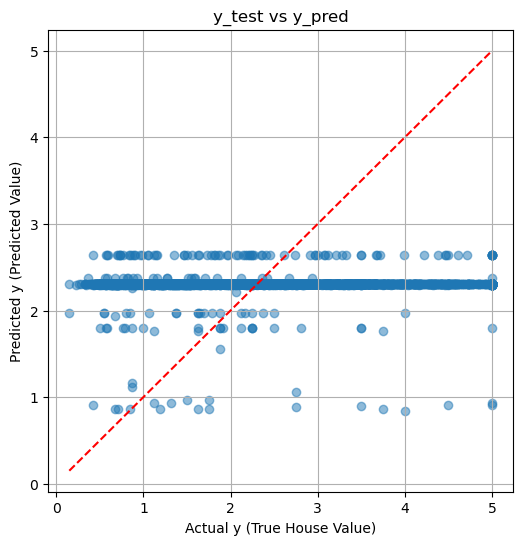

In [91]:
import matplotlib.pyplot as plt

# 예측값 구하기
y_pred = reg.predict(X_housing_test)

# 산점도 시각화
plt.figure(figsize=(6,6))
plt.scatter(y_housing_test, y_pred, alpha=0.5)
plt.xlabel("Actual y (True House Value)")
plt.ylabel("Predicted y (Predicted Value)")
plt.title("y_test vs y_pred")
plt.plot([y_housing_test.min(), y_housing_test.max()], [y_housing_test.min(), y_housing_test.max()], 'r--')
plt.grid(True)
plt.show()


### 🔹 문제 B-3
R² 점수가 의미하는 바와 0.85, -0.3의 의미를 해석하세요.

- R² 점수는 회귀 모델이 데이터를 얼마나 잘 설명하는지 나타내는 지표이다
- 0.85는 모델이 데이터 변동의 85%를 설명한다는 뜻으로, 매우 좋은 성능을 의미한다
-0.3은 모델이 오히려 평균값으로 예측하는 것보다도 못하다는 의미로, 모델의 성능이 매우 나쁨을 나타낸다

## ✅ 미션 C. 붓꽃 전시회 준비!
### 🔹 문제 C-1
KNeighborsClassifier를 이용해 붓꽃 품종을 분류하고 정확도를 계산하세요.

In [92]:
from sklearn.neighbors import KNeighborsClassifier

# 스케일링된 데이터로 모델 학습
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_iris_train_scale, y_iris_train)

# 테스트 데이터 예측
result = clf.predict(X_iris_test_scale)
print(f'prediction result={result}')

# 평균 정확도 구하기
avg_score = clf.score(X_iris_test_scale, y_iris_test)
print(f'average accuracy score={avg_score}')

# 소수점 반올림으로 정확도 계산
print(f'rounded accuracy score={round(avg_score, 3)}')

prediction result=[2 2 1 1 1 0 1 0 1 2 1 1 2 2 2 1 1 0 1 1 1 0 1 2 1 2 2 0 0 1 0 0 1 0 0 1 1
 2]
average accuracy score=0.9210526315789473
rounded accuracy score=0.921


### 🔹 문제 C-2
Confusion Matrix를 출력하고, 어떤 클래스끼리 혼동되었는지 시각적으로 분석하세요.

Confusion Matrix:
[[10  0  0]
 [ 0 15  0]
 [ 0  3 10]]


<Figure size 800x600 with 0 Axes>

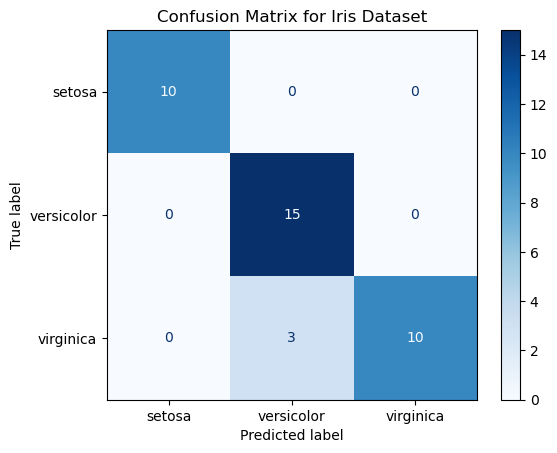

오분류된 샘플 수: 3

오분류된 샘플 상세:
샘플 #4: 실제 클래스 = virginica, 예측 클래스 = versicolor
샘플 #32: 실제 클래스 = virginica, 예측 클래스 = versicolor
샘플 #36: 실제 클래스 = virginica, 예측 클래스 = versicolor

클래스 간 혼동 분석:
virginica가 versicolor로 잘못 분류된 경우: 3회


In [93]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

# 원래 iris 데이터셋에서 클래스 이름 가져오기
iris_data = load_iris()
class_names = iris_data.target_names

# 혼동 행렬 계산
cm = confusion_matrix(y_iris_test, result)
print("Confusion Matrix:")
print(cm)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Iris Dataset')
plt.show()

# 오분류된 샘플 분석
misclassified = np.where(y_iris_test.values != result)[0]
print(f"오분류된 샘플 수: {len(misclassified)}")

if len(misclassified) > 0:
    print("\n오분류된 샘플 상세:")
    for idx in misclassified:
        true_class = class_names[y_iris_test.iloc[idx]]
        pred_class = class_names[result[idx]]
        print(f"샘플 #{idx}: 실제 클래스 = {true_class}, 예측 클래스 = {pred_class}")
        
    # 어떤 클래스 간 혼동이 발생했는지 분석
    print("\n클래스 간 혼동 분석:")
    class_pairs = []bb
    
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            if i != j:
                count = sum(1 for idx in misclassified 
                           if y_iris_test.iloc[idx] == i and result[idx] == j)
                if count > 0:
                    class_pairs.append((class_names[i], class_names[j], count))
    
    for true_class, pred_class, count in class_pairs:
        print(f"{true_class}가 {pred_class}로 잘못 분류된 경우: {count}회")

## ✅ 미션 D. 의외의 실험: 선형 회귀도 써보자!
### 🔹 문제 D-1
`LinearRegression`을 적용해 같은 데이터를 예측하고, KNN과의 R² 점수와 구조적 차이를 비교하세요.

## 🎁 보너스 질문
- 거리 기반 모델에서 스케일링이 필요한 이유는?
- KNN이 데이터가 많아질수록 느려지는 이유는?
- 이를 개선할 수 있는 방법은?